### Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('./dataset/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis = 1)

In [6]:
y = df['sales']

In [12]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [13]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [17]:
poly_features = polynomial_converter.transform(X)

In [19]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [20]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

### Train test split

In [21]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
test_predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
MAE = mean_absolute_error(y_test, test_predictions)

In [30]:
MSE = mean_squared_error(y_test, test_predictions)

In [31]:
RMSE = np.sqrt(MSE)

In [32]:
MAE

0.520102649503102

In [33]:
RMSE

0.7666168808901848

In [34]:
model.coef_

array([ 5.82910078e-02,  4.16613753e-02,  5.00309253e-03, -1.26205357e-04,
        1.02625399e-03, -8.66484431e-05,  4.97912753e-04, -3.11467626e-04,
        1.13606210e-04])

In [35]:
# Create the different order poly
# split poly feat train/test
# fit on train
# store/ save thr rmse for BOTH train and test 
# Plot the results (error vs poly order)

In [37]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [38]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.4339344356902067,
 0.3517083688399348,
 0.25093430355651797,
 0.20023729045436175,
 5.258394206861527,
 0.20696080521253987,
 0.1695718505595044]

In [39]:
test_rmse_errors

[1.5161519375993884,
 0.664643175726899,
 0.5803286825198471,
 0.5077742629819954,
 2.575806169242227,
 4.3308901816718155,
 174.62982254526315,
 4679.50452620065,
 95835.8634070512]

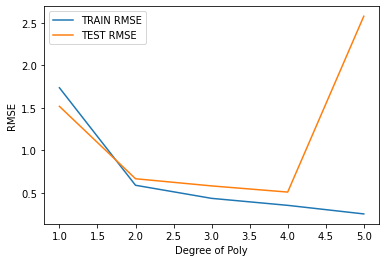

In [41]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST RMSE' )


plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [42]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [44]:
final_model = LinearRegression()

In [45]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [46]:
from joblib import dump, load

In [47]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [48]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']